# matrix multiplication

Dataset length: 10000
Images shape: (10000, 28, 28)
Labels shape: (10000,)


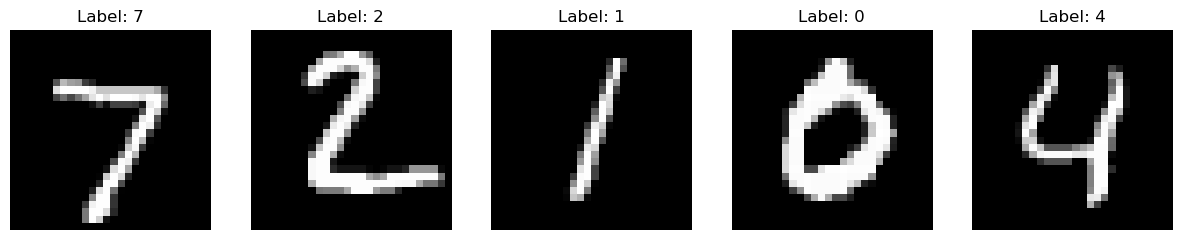

In [582]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Download and load the MNIST dataset
mnist = datasets.MNIST(root="./data", train=False, download=True)

# Print the length of the dataset   
print("Dataset length:", len(mnist))

# Convert the entire dataset to NumPy arrays
images_np = []
labels_np = []

for i in range(len(mnist)):
    image, label = mnist[i]
    # Convert the image to a NumPy array
    image_np = transforms.ToTensor()(image).numpy()[0]
    images_np.append(image_np)
    labels_np.append(label)

# Convert lists to NumPy arrays
images_np = np.array(images_np)
labels_np = np.array(labels_np)

# Print the shapes of the arrays
print("Images shape:", images_np.shape)
print("Labels shape:", labels_np.shape)

# Access the first 5 images and labels
first_5_images = images_np[:5]
first_5_labels = labels_np[:5]

# Plot the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].imshow(first_5_images[i], cmap='gray')  # Display in grayscale
    axes[i].set_title(f"Label: {first_5_labels[i]}")
    axes[i].axis('off')  # Turn off axis labels

plt.show()


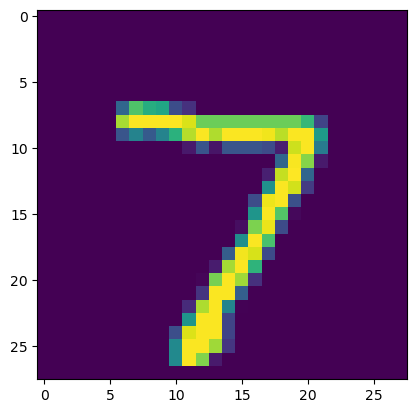

In [583]:
images_np[0].shape
plt.imshow(images_np[0])

# "Matrix multiplication"


In [584]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [585]:
m1 = images_np[:5].reshape(5, -1)
m1.shape

(5, 784)

In [586]:
torch.tensor(images_np[:5]).view(5, -1).shape


torch.Size([5, 784])

In [587]:
m2 = weights

m1.shape, m2.shape

((5, 784), torch.Size([784, 10]))

In [588]:
ar, ac = m1.shape
br, bc = m2.shape

(ar, ac), (br, bc)

((5, 784), (784, 10))

In [589]:
# resultant tensor

t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [590]:
for i in range(ar): #5 each row one at aa time
    for j in range(bc): #10  each column one ata time
        for k in range(ac): # 784
            t1[i,j] += m1[i, k] * m2[k,j]

t1

tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [591]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    c= torch.zeros(ar,bc)
    for i in range(ar): #5 each row one at aa time
        for j in range(bc): #10  each column one ata time
            for k in range(ac): # 784
                c[i,j] += a[i, k] * b[k,j]

    return c
%time matmul(m1,m2)

CPU times: user 1.38 s, sys: 0 ns, total: 1.38 s
Wall time: 1.37 s


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [592]:
# numba tak python adn turns it into machime cpde
from numba import njit
import numpy as np

In [593]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [594]:
%time dot(np.array([1. , 2., 3.]), np.array([1. , 2., 3.]))

CPU times: user 120 ms, sys: 986 µs, total: 121 ms
Wall time: 120 ms


14.0

In [595]:
%time dot(np.array([1. , 2., 3.]), np.array([1. , 2., 3.]))

CPU times: user 35 µs, sys: 1e+03 ns, total: 36 µs
Wall time: 40.5 µs


14.0

In [596]:
%time dot(np.array([1. , 2., 3.,8., 99.]), np.array([1. , 2., 3.,99.,99.]))

CPU times: user 43 µs, sys: 2 µs, total: 45 µs
Wall time: 52 µs


10607.0

# first time it takes  to compile than it works at c's speed

now replicate that function

In [597]:
def matmul_njit(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    c= torch.zeros(ar,bc)
    for i in range(ar): #5 each row one at aa time
        for j in range(bc): #10  each column one ata time
            c[i,j] = dot(a[i, :], b[:,j])

    return c
# matmul_njit(torch.tensor(m1),torch.tensor(m2))
matmul_njit(np.array(m1),np.array(m2))
    

tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [598]:
%time matmul_njit(np.array(m1),np.array(m2))


CPU times: user 1.78 ms, sys: 995 µs, total: 2.77 ms
Wall time: 2.04 ms


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [599]:
%time matmul(np.array(m1),np.array(m2))


CPU times: user 997 ms, sys: 1.86 ms, total: 999 ms
Wall time: 998 ms


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

# elementwise operation


In [600]:
a = torch.tensor([10., 6., -4.])
b = torch.tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [601]:
a+b

tensor([12., 14.,  3.])

In [602]:
(a<b).float().mean()                                                            

tensor(0.6667)

In [603]:
m1 = torch.tensor(m1)
m2 = torch.tensor(m2)


/tmp/ipykernel_35601/1036213963.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m2 = torch.tensor(m2)


In [604]:
m1.shape, m2.shape, m1.dtype, m2.dtype

(torch.Size([5, 784]), torch.Size([784, 10]), torch.float32, torch.float32)

In [605]:
def matmul_ew(a,b):
    (ar, ac), (br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c
matmul_ew(m1,m2).shape

torch.Size([5, 10])

In [606]:
# %timeit -n 50 _=matmul(m1,m2)

In [607]:
%timeit -n 50 _=matmul_ew(m1,m2)

1.75 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [608]:
def matmul_tdot(a,b):
    (ar, ac), (br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:],  b[:,j])
    return c
matmul_tdot(m1,m2).shape


torch.Size([5, 10])

In [609]:
%timeit -n 50 _=matmul_tdot(m1,m2)

1.46 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


# Broadcasting
1. How arrays with different shapes are treated during arithmetic operations.
2. THe smaller array is broadcast across larger array, so that they have ompatible shape.
3. Boadcasting provides a mean of vactorizing array operations so that looping occurs in C instead of python.
4. It does this without making needless copies of data.

In [610]:
a # rank one tensor

tensor([10.,  6., -4.])

In [611]:
a>0, a> torch.tensor([0,0,0])

(tensor([ True,  True, False]), tensor([ True,  True, False]))

`a>0` : 0 is being broadcasted here to have same dimensio as a

## broadcasting a vector to matrix

In [612]:
# m = torch.randint(0,9, (3,3));m

In [613]:
m = torch.arange(1, 10).reshape(3, 3);m, m.shape

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 torch.Size([3, 3]))

In [614]:
c= torch.tensor([10, 20, 30], dtype=torch.float32);c, c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape

(tensor([10., 20., 30.]),
 torch.Size([3]),
 torch.Size([1, 3]),
 torch.Size([3, 1]))

In [615]:
m+c, m+c

(tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]),
 tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]))

In [616]:
m+c.unsqueeze(0), (m+c.unsqueeze(0)).shape

(tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]),
 torch.Size([3, 3]))

In [617]:
m+c.unsqueeze(1), (m+c.unsqueeze(1)).shape

(tensor([[11., 12., 13.],
         [24., 25., 26.],
         [37., 38., 39.]]),
 torch.Size([3, 3]))

In [618]:
c.unsqueeze(1)+m, (c.unsqueeze(1) +m ).shape   # m+c = c+m  ; order doesn't matter

(tensor([[11., 12., 13.],
         [24., 25., 26.],
         [37., 38., 39.]]),
 torch.Size([3, 3]))

#### what actually happens


In [619]:
c.shape, m.shape

(torch.Size([3]), torch.Size([3, 3]))

In [620]:
t= c.expand_as(m);t, t.shape

(tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]),
 torch.Size([3, 3]))

In [621]:
# t actually didn't create 3 copies
t.storage()  # it stil contains (1,3) shape

 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [622]:
t.stride(), t.shape, c.shape # for every step, 0 across rows, and 1 across column;
# stride (0,1) because expansion is acrross cols

((0, 1), torch.Size([3, 3]), torch.Size([3]))

In [623]:
z =torch.tensor(0).expand_as(m); z, torch.tensor(0), z.storage(), z.stride()

(tensor([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]),
 tensor(0),
  0
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 1],
 (0, 0))

In [624]:
c.unsqueeze(0).shape, c[None,:].shape, c[None].shape

(torch.Size([1, 3]), torch.Size([1, 3]), torch.Size([1, 3]))

In [625]:
c.unsqueeze(1).shape, c[:, None].shape

(torch.Size([3, 1]), torch.Size([3, 1]))

In [626]:
m.shape, m[:, None,:].shape, m[:, None,:][:,None,:,:].shape  # inserting dimensions

(torch.Size([3, 3]), torch.Size([3, 1, 3]), torch.Size([3, 1, 1, 3]))

In [627]:
x = m[:, None,:][:,None,:,:]; x.shape, x[..., None].shape, x[None, ...].shape


(torch.Size([3, 1, 1, 3]),
 torch.Size([3, 1, 1, 3, 1]),
 torch.Size([1, 3, 1, 1, 3]))

In [628]:
c[:,None].shape, c[:,None].expand_as(m).shape

(torch.Size([3, 1]), torch.Size([3, 3]))

In [629]:
c[None].shape, c[None].expand_as(m).shape

(torch.Size([1, 3]), torch.Size([3, 3]))

In [630]:
c[:,None].expand_as(m) +m , m+c[:,None]

(tensor([[11., 12., 13.],
         [24., 25., 26.],
         [37., 38., 39.]]),
 tensor([[11., 12., 13.],
         [24., 25., 26.],
         [37., 38., 39.]]))

In [631]:
c[None].expand_as(m)+m, m+c[None]

(tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]),
 tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]))

In [632]:
c

tensor([10., 20., 30.])

### Broadcasting Rules

In [633]:
c[None, :], c[:,None]

(tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [634]:
c[None, :].shape, c[:,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [635]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [636]:
c[None,:].shape, c[:,None].shape, (c[None,:] * c[:,None]).shape

(torch.Size([1, 3]), torch.Size([3, 1]), torch.Size([3, 3]))

In [637]:
torch.matmul(c[None:], c[:,None]).shape, (c[None,:] * c[:,None]).shape

(torch.Size([1]), torch.Size([3, 3]))

In [638]:
c[None,:].shape, c[:,None].shape, (c[None,:] * c[:,None]).shape

(torch.Size([1, 3]), torch.Size([3, 1]), torch.Size([3, 3]))

In [639]:
c[None,:], c[:,None], c[None,:] * c[:,None]

(tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]),
 tensor([[100., 200., 300.],
         [200., 400., 600.],
         [300., 600., 900.]]))

In [640]:
a= torch.tensor([7,8,9])

a[None,:]*c[:,None]


tensor([[ 70.,  80.,  90.],
        [140., 160., 180.],
        [210., 240., 270.]])

In [641]:
a[None,:].shape,c[:,None].shape


(torch.Size([1, 3]), torch.Size([3, 1]))

In [642]:
a[None,:]*c[:,None]


tensor([[ 70.,  80.,  90.],
        [140., 160., 180.],
        [210., 240., 270.]])

In [643]:
(a[None,:]).expand_as(m) , (c[:,None]).expand_as(m), (a[None,:]).expand_as(m) * (c[:,None]).expand_as(m)

(tensor([[7, 8, 9],
         [7, 8, 9],
         [7, 8, 9]]),
 tensor([[10., 10., 10.],
         [20., 20., 20.],
         [30., 30., 30.]]),
 tensor([[ 70.,  80.,  90.],
         [140., 160., 180.],
         [210., 240., 270.]]))

In [644]:
a[:, None]*c[None,:]   # c[None,:] will be multiplied to every element of a[:,None] one by one


tensor([[ 70., 140., 210.],
        [ 80., 160., 240.],
        [ 90., 180., 270.]])

In [645]:
# this actually happens
(a[:, None]).expand_as(m) , (c[None,:]).expand_as(m), (a[:, None]).expand_as(m) * (c[None,:]).expand_as(m)

(tensor([[7, 7, 7],
         [8, 8, 8],
         [9, 9, 9]]),
 tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]),
 tensor([[ 70., 140., 210.],
         [ 80., 160., 240.],
         [ 90., 180., 270.]]))

In [646]:
c[None,:] >c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [647]:
(a[:, None]).expand_as(m) , (c[None,:]).expand_as(m), (a[:, None]).expand_as(m) >(c[None,:]).expand_as(m)

(tensor([[7, 7, 7],
         [8, 8, 8],
         [9, 9, 9]]),
 tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]),
 tensor([[False, False, False],
         [False, False, False],
         [False, False, False]]))

##### when operating on two arrays/tensors, numpy/pytorch  compares their shapes element-wise. It starts with the trailing dimensions, work its way forward. Two dimensions are compatible when
1. they are equal
2. one of them is 1, in which case that dimension is broadcasted to make it the same size

# matmul with broadcasting

In [648]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [649]:
digit = m1[0]
digit.shape

torch.Size([784])

In [650]:
digit[:, None].shape, m2.shape  # maltipying digit with each 784 vector in m2

(torch.Size([784, 1]), torch.Size([784, 10]))

In [651]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [652]:
(digit[:, None]*m2).shape

torch.Size([784, 10])

In [653]:
def matmul_broadcasted(a,b):
    (ar, ac), (br,bc) = a.shape, b.shape

    c = torch.zeros(ar, bc)
    for i in range(ar):
        # print(f"\na:{a[i].shape} ||||| a[i, :, None]:{a[1, :, None].shape} ||||| b[i]:{b.shape}")

        # c[i,j] = (a[i,:] * b[:,j]).sum() # previous version
        c[i] = (a[i, :, None] *b).sum(dim=0) # broadcast version
    return c
%timeit -n 50 _=matmul_broadcasted(m1,m2)

203 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Yes, that's a great summary of how broadcasting works in both NumPy and PyTorch! When performing operations on two tensors (or arrays), their shapes are compared element-wise starting from the last dimension (the rightmost one) and moving left. Here's how broadcasting works in detail:

### Broadcasting Rules

When comparing dimensions of two tensors for broadcasting, the following rules apply:

1. **Equal Dimensions**:
   - If the dimensions of both tensors are equal, they are compatible and can be directly used in the operation.
   
   Example:
   ```python
   Tensor A: shape (3, 4)
   Tensor B: shape (3, 4)
   Result: Compatible (element-wise operation proceeds)
   ```

2. **One Dimension is 1**:
   - If one of the dimensions is 1, that dimension can be broadcasted (expanded) to match the size of the other dimension.
   
   Example:
   ```python
   Tensor A: shape (3, 4)
   Tensor B: shape (1, 4)  # Can be broadcasted to (3, 4)
   Result: Compatible (element-wise operation proceeds)
   ```

3. **Trailing Dimensions**:
   - The comparison starts with the last dimension (rightmost) and moves to the left. Dimensions are compared one by one according to the rules above.

### Examples to Illustrate Broadcasting

#### Example 1: Compatible Shapes
```python
import torch

a = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
b = torch.tensor([[1], [2]])  # Shape: (2, 1)

# Broadcasting b to match the shape of a:
# b becomes: [[1, 1, 1], [2, 2, 2]]

result = a * b
print(result)
```

**Output**:
```
tensor([[ 1,  2,  3],
        [ 8, 10, 12]])
```

- `a` has shape `(2, 3)`.
- `b` has shape `(2, 1)` and is broadcasted to shape `(2, 3)`.

#### Example 2: Incompatible Shapes
```python
import torch

a = torch.tensor([1, 2, 3])  # Shape: (3,)
b = torch.tensor([[1, 2], [3, 4], [5, 6]])  # Shape: (3, 2)

# These shapes are incompatible because their dimensions can't be broadcasted together.
# The second dimension of a is missing, and it can't be broadcasted to match b.

# The following would raise an error:
# result = a * b
```

This will raise an error because:

- `a` has shape `(3,)`.
- `b` has shape `(3, 2)`.
- They are incompatible because the second dimension of `a` is missing, and broadcasting rules cannot apply.

#### Example 3: Scalar Broadcasting
```python
import torch

a = torch.tensor([1, 2, 3])  # Shape: (3,)
b = torch.tensor(2)  # Shape: ()

# Broadcasting b to the shape of a:
# b becomes: [2, 2, 2]

result = a * b
print(result)
```

**Output**:
```
tensor([2, 4, 6])
```

- `b` is a scalar (shape `()`), so it gets broadcasted to match the shape of `a` (shape `(3,)`).

### Summary

- **Broadcasting** allows operations on tensors of different shapes by "expanding" one or both tensors' dimensions to make their shapes compatible.
- The comparison starts from the trailing dimensions (rightmost) and works its way left.
- If the dimensions match or one of them is 1, they are compatible for broadcasting.
- If the dimensions do not match and neither is 1, the operation will result in an error. 

This feature is extremely useful in many neural network operations, allowing for efficient and flexible computation without needing to manually adjust tensor shapes.

To understand broadcasting and how dimensions are compared from right to left, let’s walk through a practical example with tensors of different shapes and see how they are broadcasted to a common shape for element-wise operations.

### Example Tensors

Consider two tensors:

1. **Tensor A**: Shape `(1, 3)`
2. **Tensor B**: Shape `(3, 1)`

```python
import torch

A = torch.tensor([[1, 2, 3]])  # Shape: (1, 3)
B = torch.tensor([[4], [5], [6]])  # Shape: (3, 1)
```

### Tensor Shapes Before Broadcasting

- **Tensor A**:
  ```
  [[1, 2, 3]]
  ```
  Shape: `(1, 3)`

- **Tensor B**:
  ```
  [[4],
   [5],
   [6]]
  ```
  Shape: `(3, 1)`

### Broadcasting Rules

**Broadcasting** works by aligning tensors to a common shape using the following rules:

1. **Compare Dimensions**: Start comparing the shapes of tensors from the rightmost dimension.
2. **Dimensions Must Match or Be 1**:
   - If dimensions are equal, they match.
   - If one dimension is `1`, it can be broadcast to match the other dimension.
   - If dimensions are different and neither is `1`, broadcasting is not possible.

### Applying Broadcasting

1. **Align Shapes**: For tensors `A` and `B`, align them for element-wise operations. The shapes are `(1, 3)` and `(3, 1)`.

2. **Start Comparing from Right**:
   - **Rightmost Dimension**: `3` (from `A`) and `1` (from `B`)
     - The `1` from `B` can be broadcast to `3`, making the dimensions match.
   - **Next Dimension**: `1` (from `A`) and `3` (from `B`)
     - The `1` from `A` can be broadcast to `3`, making the dimensions match.

3. **Broadcasting**:
   - **Expand `A`** from `(1, 3)` to `(3, 3)`:
     ```
     [[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]]
     ```
   - **Expand `B`** from `(3, 1)` to `(3, 3)`:
     ```
     [[4, 4, 4],
      [5, 5, 5],
      [6, 6, 6]]
     ```

### Element-Wise Operation

Perform element-wise multiplication on the broadcasted tensors:

```python
result = A * B
print(result)
```

**Output**:
```
tensor([[ 4,  8, 12],
        [ 5, 10, 15],
        [ 6, 12, 18]])
```

### Summary

- **Initial Shapes**: `(1, 3)` and `(3, 1)`
- **Broadcasted Shapes**: Both tensors are expanded to `(3, 3)`.
- **Result Shape**: The result of the element-wise multiplication is a tensor with shape `(3, 3)`.

By comparing dimensions from right to left and using the rules for broadcasting, PyTorch can automatically expand tensors to make their shapes compatible for element-wise operations. This allows for efficient and intuitive computation without manually reshaping tensors.

Yes, you’re correct. In simple matrix multiplication, if you have matrices \(A\) and \(B\) with shapes \((1, 3)\) and \((3, 1)\), respectively, the result of the multiplication will indeed be a \((1, 1)\) matrix. Let's break this down:

### Matrix Multiplication

Matrix multiplication is different from element-wise multiplication. The shapes of the matrices must be compatible for matrix multiplication:

1. **Matrix \(A\)**: Shape \((1, 3)\)
2. **Matrix \(B\)**: Shape \((3, 1)\)

For matrix multiplication:

- **The number of columns in \(A\)** must match **the number of rows in \(B\)**. Here, \(A\) has 3 columns, and \(B\) has 3 rows, so the multiplication is valid.
- **The resulting matrix** will have the number of rows from \(A\) and the number of columns from \(B\). Therefore, the result will have shape \((1, 1)\).

### Calculation

The matrix multiplication of \(A\) and \(B\) can be computed as follows:

```python
import torch

A = torch.tensor([[1, 2, 3]])  # Shape: (1, 3)
B = torch.tensor([[4], [5], [6]])  # Shape: (3, 1)

# Matrix multiplication
result = torch.mm(A, B)  # or A @ B in newer versions of PyTorch
print(result)
```

**Result**:

```
tensor([[32]])  # Shape: (1, 1)
```

### Explanation

- **Matrix \(A\)**:
  ```
  [[1, 2, 3]]
  ```

- **Matrix \(B\)**:
  ```
  [[4],
   [5],
   [6]]
  ```

To compute the result, perform the dot product of \(A\) and \(B\):

\[ 
\text{result} = \begin{bmatrix}
1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6
\end{bmatrix}
= \begin{bmatrix}
4 + 10 + 18
\end{bmatrix}
= \begin{bmatrix}
32
\end{bmatrix}
\]

### Summary

- **Matrix Shapes**: \(A\) (1, 3) and \(B\) (3, 1)
- **Matrix Multiplication Result**: The result is a matrix with shape (1, 1), containing the sum of the products of corresponding elements from \(A\) and \(B\).

It looks like there might have been a misunderstanding between matrix multiplication and element-wise multiplication. Here's a clarification:

### Matrix Multiplication vs. Element-Wise Multiplication

1. **Matrix Multiplication**:
   - **Shape Rules**: For two matrices \(A\) with shape \((1, 3)\) and \(B\) with shape \((3, 1)\), matrix multiplication will result in a matrix of shape \((1, 1)\).
   - **Operation**: The result is computed as the dot product of \(A\) and \(B\).

2. **Element-Wise Multiplication**:
   - **Shape Rules**: For tensors with shapes \((1, 3)\) and \((3, 1)\), element-wise multiplication (using broadcasting) results in a matrix of shape \((3, 3)\).
   - **Operation**: Broadcasting expands the shapes to match, and then the element-wise product is computed.

### Why You Get a \(3 \times 3\) Matrix

In the example where you get a \(3 \times 3\) matrix, you performed element-wise multiplication rather than matrix multiplication. Here’s why:

#### Example Tensor Shapes

```python
import torch

A = torch.tensor([[1, 2, 3]])  # Shape: (1, 3)
B = torch.tensor([[4], [5], [6]])  # Shape: (3, 1)
```

#### Element-Wise Multiplication

```python
result = A * B
print(result)
```

**Output**:

```
tensor([[ 4,  8, 12],
        [ 5, 10, 15],
        [ 6, 12, 18]])
```

**Explanation**:

- **Tensor A**: Shape `(1, 3)`, which is effectively a row vector.
- **Tensor B**: Shape `(3, 1)`, which is effectively a column vector.

When you perform element-wise multiplication:

1. **Broadcasting**:
   - **Expand `A`** from `(1, 3)` to `(3, 3)`:
     ```
     [[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]]
     ```

   - **Expand `B`** from `(3, 1)` to `(3, 3)`:
     ```
     [[4, 4, 4],
      [5, 5, 5],
      [6, 6, 6]]
     ```

2. **Element-Wise Multiplication**:
   ```
   [[1*4, 2*4, 3*4],
    [1*5, 2*5, 3*5],
    [1*6, 2*6, 3*6]]
   ```

   Which results in:
   ```
   [[ 4,  8, 12],
    [ 5, 10, 15],
    [ 6, 12, 18]]
   ```

### Summary

- **Matrix Multiplication**: `(1, 3) * (3, 1)` results in `(1, 1)`.
- **Element-Wise Multiplication**: `(1, 3) * (3, 1)` with broadcasting results in `(3, 3)`.

The \(3 \times 3\) matrix you observed was due to element-wise multiplication with broadcasting, not matrix multiplication.

Yes, matrix multiplication and element-wise multiplication serve different purposes and are used for different operations in neural networks. Here’s a breakdown of why both are important and how they are used:

### Matrix Multiplication

**Matrix Multiplication** is used to combine two matrices in a way that is fundamental for operations like:

1. **Linear Transformations**:
   - In neural networks, each layer typically performs a linear transformation of the input data using a weight matrix.
   - For example, in a fully connected layer (or dense layer), the operation is:
     \[
     \text{output} = \text{input} \times \text{weights} + \text{bias}
     \]
   - Here, \(\text{input}\) is a matrix (or tensor), \(\text{weights}\) is another matrix, and the result is computed using matrix multiplication.

2. **Transformation of Features**:
   - Matrix multiplication is used to transform the input features into a new space. This is crucial in neural networks for learning and representing complex patterns.

**Example**:

```python
import torch

# Input tensor of shape (batch_size, features)
input_tensor = torch.tensor([[1., 2., 3.]])  # Shape: (1, 3)

# Weight matrix of shape (3, 2)
weights = torch.tensor([[0.1, 0.2],
                        [0.3, 0.4],
                        [0.5, 0.6]])  # Shape: (3, 2)

# Matrix multiplication
output_tensor = torch.mm(input_tensor, weights)  # Shape: (1, 2)
print(output_tensor)
```

### Element-Wise Multiplication

**Element-Wise Multiplication** is used to perform operations where each element of one matrix or tensor is multiplied by the corresponding element of another matrix or tensor. This is crucial for:

1. **Activation Functions**:
   - Element-wise operations are used in activation functions (e.g., ReLU, sigmoid) applied after linear transformations.

2. **Attention Mechanisms**:
   - In attention mechanisms, element-wise multiplication is used to weight features.

3. **Normalization and Regularization**:
   - Techniques like dropout or batch normalization use element-wise operations to modify activations.

**Example**:

```python
import torch

# Two tensors of the same shape
tensor1 = torch.tensor([[1., 2., 3.]])
tensor2 = torch.tensor([[4., 5., 6.]])

# Element-wise multiplication
result = tensor1 * tensor2
print(result)
```

### Why Both Are Used in Neural Networks

- **Matrix Multiplication** is used to perform linear transformations and combine features in a structured way that allows the network to learn complex patterns.
- **Element-Wise Multiplication** is used for operations that need to be applied independently to each element of the tensors, such as applying activation functions, attention mechanisms, or modifying feature maps.

Both types of multiplication are fundamental to different aspects of neural network operations, and they complement each other to enable the network to learn from data and make predictions effectively.

Matrix multiplication and element-wise multiplication serve different purposes in neural networks:

Matrix multiplication:
1. Used for layer operations (e.g. dense layers)
2. Combines input features with learned weights
3. Allows networks to learn complex mappings
4. Essential for most neural network architectures

Element-wise multiplication:
1. Used in specific operations (e.g. gates in LSTMs)
2. Applied in some activation functions
3. Used in attention mechanisms
4. Helpful for feature scaling or masking

Matrix multiplication is more fundamental to neural network operations, while element-wise multiplication is used in specific architectures or techniques.

Would you like me to elaborate on any specific aspect of these operations or their applications in neural networks?

In [654]:
torch.dot(torch.tensor([1,2,3]), torch.tensor([1,2,3]))

tensor(14)

Replacing matrix multiplication with element-wise multiplication in neural networks isn't generally feasible or desirable. Here's why:

1. Dimensionality: Matrix multiplication allows combining inputs of different dimensions, which is crucial for connecting layers of different sizes. Element-wise multiplication requires matching dimensions.

2. Feature interaction: Matrix multiplication enables each output to be influenced by all inputs, allowing the network to learn complex relationships. Element-wise multiplication limits each output to depend only on the corresponding input.

3. Expressiveness: Neural networks with matrix multiplication are universal function approximators. Replacing this with element-wise operations would severely limit the network's ability to learn and represent complex functions.

4. Information flow: Matrix multiplication allows information to flow and combine across all dimensions, which is essential for the network's ability to extract and process features.

5. Established theory: Much of the theory and practice of neural networks is built on the properties of matrix multiplication.

However, there are some specialized cases where element-wise operations play a crucial role:

- In certain types of convolutional neural networks
- In attention mechanisms
- In gating mechanisms (like in LSTMs)

These use element-wise operations in conjunction with, not as a replacement for, matrix multiplications.

Would you like me to expand on any of these points or discuss specific architectures where element-wise operations are important?

## striding

Let's walk through what happens when you use `torch.tensor(0).expand_as(m)` and then inspect the properties of the resulting tensor `z`.

 1. `z = torch.tensor(0).expand_as(m)`

This creates a tensor `z` that has the same shape as `m`, but all elements are just views of the original scalar `0`. This means that all elements in `z` reference the same memory location as the original scalar.

 2. Inspecting the Tensor `z` and Its Properties

Let's look at what each part of the code returns:


In [655]:
m = torch.arange(1, 10).reshape(3, 3)  # Create a 3x3 tensor
z = torch.tensor(0).expand_as(m)       # Expand scalar 0 to the shape of m

z, torch.tensor(0), z.storage(), z.stride()


(tensor([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]),
 tensor(0),
  0
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 1],
 (0, 0))


- **`z`**: This will be a `3x3` tensor filled with `0`s, but all elements are views of the same scalar.

- **`torch.tensor(0)`**: This is the original scalar tensor with a single value `0`.

- **`z.storage()`**: The storage is shared and will still only contain the original `0`. The storage doesn't actually contain multiple copies of the value.

- **`z.stride()`**: This indicates how many steps you need to move in the storage to get to the next element along each dimension. Since all elements in `z` are views of the same scalar, the stride will show `(0, 1)`.

##### Example Output

```python



tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),  # z (expanded tensor)

tensor(0),            # Original scalar tensor



<torch.Storage at 0x7f8e2410a9d0>,  # Shared storage (only contains the scalar 0)

(0, 1)                # Stride
```

- **`z`**: A `3x3` tensor of zeros, where all elements are views of the same scalar.
- **`torch.tensor(0)`**: The original scalar.
- **`z.storage()`**: The storage shows that it is still pointing to the single value `0`.
- **`z.stride()`**: The stride `(0, 1)` indicates that moving along the rows doesn't require a step in storage (since they all reference the same value), while moving along columns requires a step of `1` in storage.

 Key Points

- The tensor `z` doesn't create multiple copies of the value `0`. Instead, it's an expanded view.
- The storage remains the same and contains just one `0`.
- The stride `(0, 1)` reflects that the tensor is effectively "flat" and doesn't take up more memory.

The concept of **stride** in PyTorch (and in many other tensor manipulation libraries) refers to the number of elements to skip in memory to move to the next position along a specific dimension of a tensor.

### Explanation of Stride `(0, 1)`

- **`(0, 1)`**: This is a tuple representing the stride for each dimension of the tensor.

#### Breaking Down the Stride `(0, 1)`:

1. **Stride `0` for the First Dimension (Rows)**:
   - A stride of `0` in the first dimension (rows) means that to move from one row to the next, no actual step is made in memory. In other words, all rows are pointing to the same memory location (the same scalar value). This happens because the tensor is an expanded view of a single scalar, not a separate copy for each element in each row.
   - As a result, all rows are effectively the same row, and no additional memory is traversed when moving between rows.

2. **Stride `1` for the Second Dimension (Columns)**:
   - A stride of `1` in the second dimension (columns) indicates that to move from one column to the next within the same row, you move one step in memory. In a typical 2D tensor, this would mean moving to the next element within the row.
   - However, since in this case the entire tensor is just an expanded view of a single scalar, this stride of `1` doesn't actually correspond to different memory locations, but rather just points back to the same scalar value.

### Visualization

Consider a tensor created like this:

```python
z = torch.tensor(0).expand(3, 3)
```

The tensor `z` might look like this:

```
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
```

But internally, all of these `0`s are just views of the same scalar:

- The stride `(0, 1)` indicates that moving between elements in the first dimension (rows) does not require moving in memory (`0` stride).
- Moving between elements in the second dimension (columns) requires a step of `1`, but since all elements are just views of the same scalar, this stride of `1` doesn't actually change the memory location—it just points back to the same value.

 Why Stride `(0, 1)`?

- **Efficient Memory Usage**: The tensor does not allocate separate memory for each element, leading to efficient memory usage.
- **Shared Value**: All elements in the tensor are views of the same underlying scalar value (`0`), and hence, moving across rows or columns doesn't require additional memory operations.